In [1]:
# importing data manipulation libraries

import pandas as pd
import numpy as np

# importing visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

# importing warning and error handling libraries

import warnings
warnings.filterwarnings('ignore')

# importing logging library

import logging
logging.basicConfig(filename='logfile.log', 
                    level=logging.INFO,
                    format='[%(asctime)s] %(levelname)s: %(message)s',
                    filemode='w')


In [2]:
def load_data():
    url='https://raw.githubusercontent.com/MontyVasita18/EnE_TitanicModelBuilding/refs/heads/main/research/titanic_train.csv'
    data=pd.read_csv(url)
    return data
df=load_data()


In [3]:
df.sample(frac=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
...,...,...,...,...,...,...,...,...,...,...,...,...
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

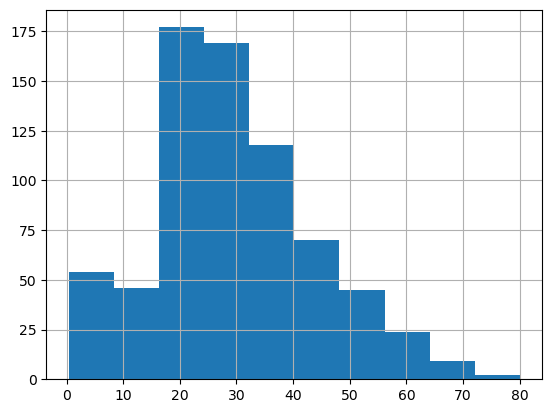

In [6]:
df.Age.hist()

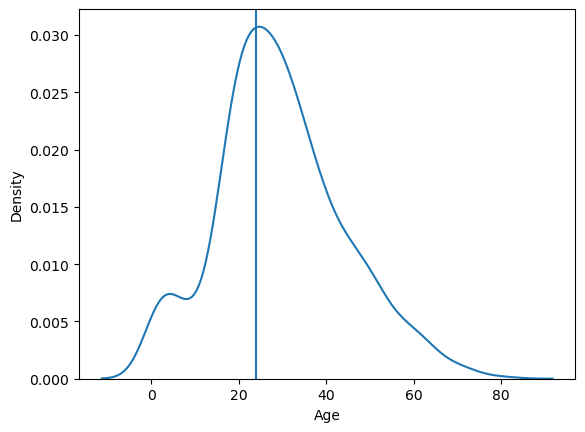

In [7]:
sns.kdeplot(df,x='Age')
plt.axvline(24)

In [8]:
Southampton_city_record=df[df["Embarked"]=='S']

Southampton_city_record["Age"].median()

28.0

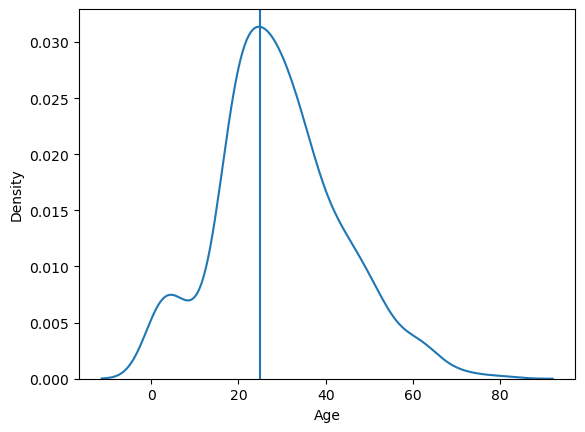

In [9]:

sns.kdeplot(Southampton_city_record,x='Age')
plt.axvline(25)

In [10]:
Cherbourg_city_record=df[df["Embarked"]=='C']

Cherbourg_city_record["Age"].median()

29.0

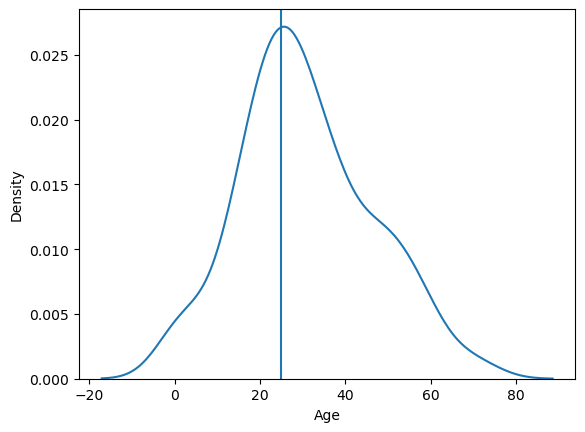

In [11]:
sns.kdeplot(Cherbourg_city_record,x='Age')
plt.axvline(25)

In [12]:
Queenstown_city_record=df[df["Embarked"]=='Q']

Queenstown_city_record["Age"].median()

27.0

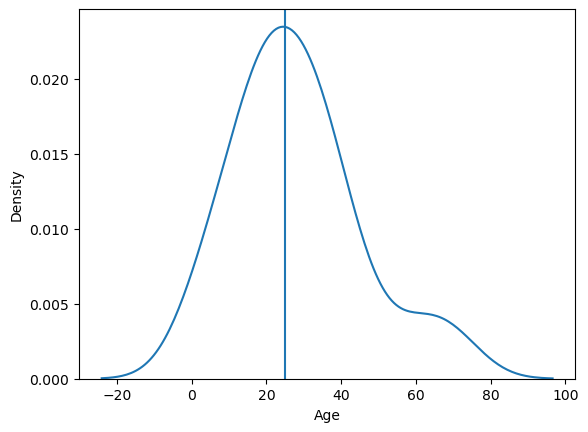

In [13]:
sns.kdeplot(Queenstown_city_record,x='Age')
plt.axvline(25)

In [14]:
df["Age"]=df["Age"].fillna(25)

In [15]:
df["Embarked"]=df["Embarked"].fillna("S")

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df.drop(columns=['Cabin'],inplace=True)

In [17]:
df.drop(columns=["Name"],inplace=True)

In [18]:
df.drop(columns=['Ticket'],inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,25.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [38]:
# Encoding Sex Column With 0 and 1

# Male: 1 or femal: 0

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])



In [39]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,25.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [50]:
# Spliting Data into Target and Independent Column

X=df.drop(columns="Survived") # independent Column

y=df['Survived'] # Target Column

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
# Splitting data into train and test DataSet

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=42)

In [42]:
# Our Data set have Minor Outliers so we need to use Scalling Technique 

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [43]:
# Checking Data is Balanced or not
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [95]:
# Balancing The Target Column Using 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [98]:
y_train.value_counts()

Survived
1    392
0    392
Name: count, dtype: int64

## Appling Different Algorithms 

**Applying Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_predict_RF=RF.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
accuracy_score_RF=accuracy_score(y_test,y_predict_RF)

print(round((accuracy_score_RF)*100),'%')

82 %


**Applying Decision Tree Classifier**

In [96]:
from sklearn.tree import DecisionTreeClassifier

DE=DecisionTreeClassifier()
DE.fit(X_train,y_train)
y_predict_DE=DE.predict(X_test)


accuracy_score_DF=accuracy_score(y_test,y_predict_DE)

print(round((accuracy_score_DF)*100),'%')


76 %
